# Project: Moving average crossover
https://en.wikipedia.org/wiki/Moving_average_crossover

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Data

In [4]:
import yfinance as yf
close = yf.Ticker('AAPL').history(start='2020-01-01', end='2024-12-31').Close.to_list()
close[:5]

[72.87611389160156,
 72.16761016845703,
 72.74266052246094,
 72.4005355834961,
 73.5652084350586]

In [5]:
len(close)

1192

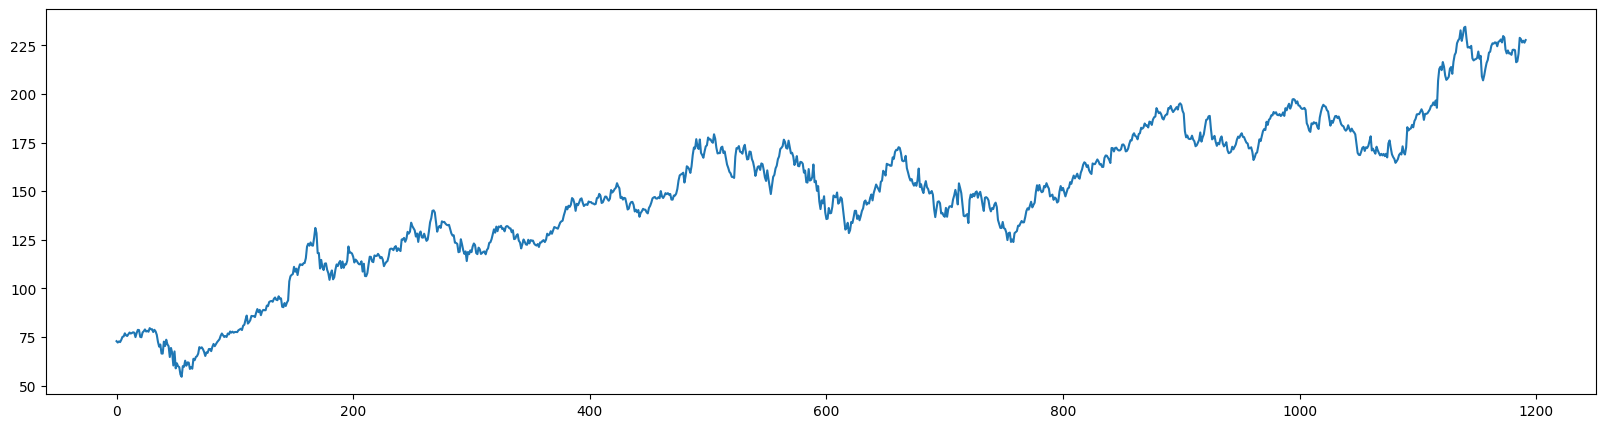

In [6]:
plt.figure(figsize=(20,5))
plt.plot(close);

In [7]:
def data_import(symbol='AAPL', start='2020-01-01', end='2024-12-31'):
    return yf.Ticker(symbol).history(start=start, end=end).Close.to_list()

data_import()[:5]

[72.8760986328125,
 72.16761779785156,
 72.74266052246094,
 72.40054321289062,
 73.5652084350586]

## Simple Moving Average

In [9]:
def sma(data, period):
    sma_list = [np.nan]*(period-1)
    for i in range(len(data)-period+1):
        sma_list.append(sum(data[i:i+period])/period)
    return sma_list

In [10]:
toy_data = [1,2,3,4,5,6]

In [11]:
sma(toy_data, 3)

[nan, nan, 2.0, 3.0, 4.0, 5.0]

In [12]:
sma(toy_data, 4)

[nan, nan, nan, 2.5, 3.5, 4.5]

In [13]:
short = sma(close, 50)
long = sma(close, 200)

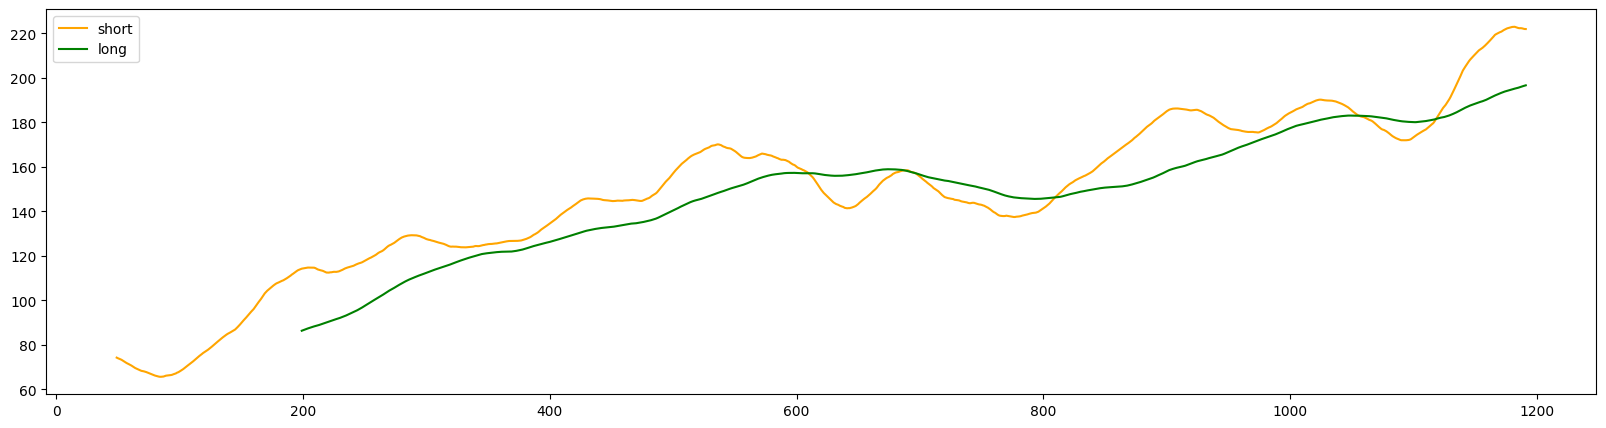

In [14]:
plt.figure(figsize=(20,5))
plt.plot(short, label='short', c='orange')
plt.plot(long, label='long', c='green')
plt.legend();

## Crossovers

A buy signal occurs when the shorter-term moving average (MA) crosses above the longer-term MA, signaling an upward trend shift, commonly referred to as a “golden cross”.

A sell signal occurs when the shorter-term moving average (MA) crosses below the longer-term MA, signaling an downward trend shift, commonly referred to as a “dead/death cross”.

Reference: https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp#:~:text=Moving averages with a shorter,of potential support or resistance



In [17]:
actions = [] 
for i in range(len(close)-1):
    if (short[i] < long[i]) & (short[i+1] > long[i+1]):
        actions.append({'signal': 'buy', 'day':i, 'value': close[i]})

    if (short[i] > long[i]) & (short[i+1] < long[i+1]):
        actions.append({'signal': 'sell', 'day':i, 'value': close[i]})

actions     

[{'signal': 'sell', 'day': 609, 'value': 149.3455047607422},
 {'signal': 'buy', 'day': 687, 'value': 148.78150939941406},
 {'signal': 'sell', 'day': 696, 'value': 143.83628845214844},
 {'signal': 'buy', 'day': 809, 'value': 158.0367889404297},
 {'signal': 'sell', 'day': 1055, 'value': 170.70062255859375},
 {'signal': 'buy', 'day': 1118, 'value': 212.82366943359375}]

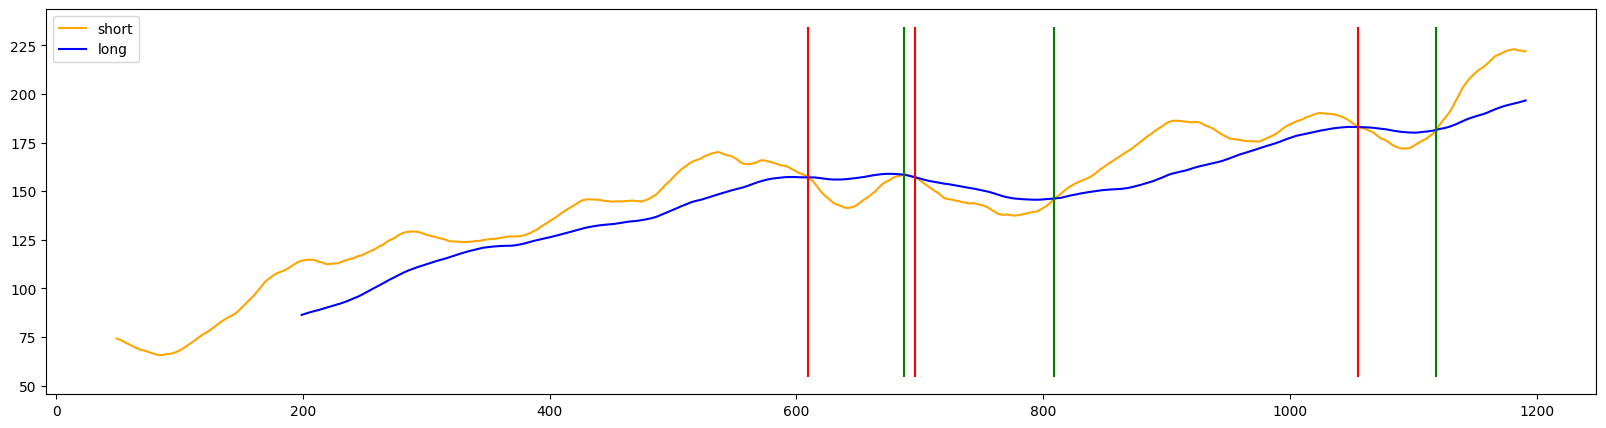

In [18]:
plt.figure(figsize=(20,5))
plt.plot(short, label='short', c='orange')
plt.plot(long, label='long', c='b')
plt.legend();

for action in actions:
    if action['signal'] == 'buy':
        plt.vlines(action['day'], min(close), max(close), color='green')
    else:
        plt.vlines(action['day'], min(close), max(close), color='red')

[{'signal': 'sell', 'day': 609, 'value': 149.3455047607422},
 {'signal': 'buy', 'day': 687, 'value': 148.78150939941406},
 {'signal': 'sell', 'day': 696, 'value': 143.83628845214844},
 {'signal': 'buy', 'day': 809, 'value': 158.0367889404297},
 {'signal': 'sell', 'day': 1055, 'value': 170.70062255859375},
 {'signal': 'buy', 'day': 1118, 'value': 212.82366943359375}]

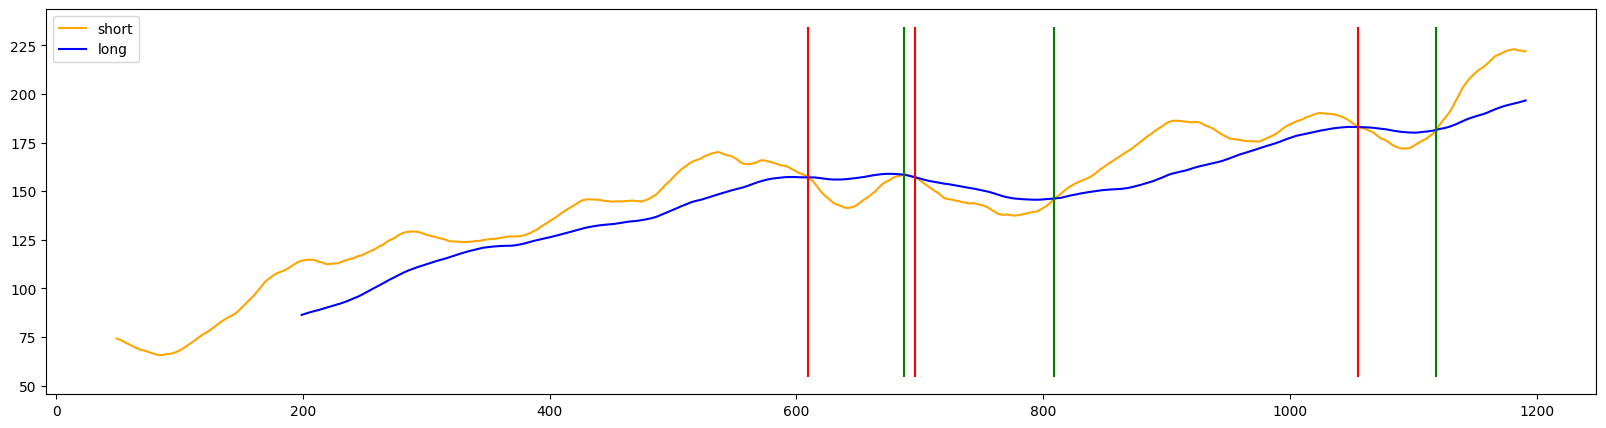

In [19]:
def action_producer(long_data, short_data, close_data, graph=False):
    actions_list = [] 
    for i in range(len(long)-1):
        if (short_data[i] < long_data[i]) & (short_data[i+1] > long_data[i+1]):
            actions_list.append({'signal': 'buy', 'day':i, 'value': close_data[i]})
    
        if (short[i] > long[i]) & (short[i+1] < long[i+1]):
            actions_list.append({'signal': 'sell', 'day':i, 'value': close_data[i]})

    if graph:
        plt.figure(figsize=(20,5))
        plt.plot(short, label='short', c='orange')
        plt.plot(long, label='long', c='b')
        plt.legend()
        
        for action in actions_list:
            if action['signal'] == 'buy':
                plt.vlines(action['day'], min(close), max(close), color='green')
            else:
                plt.vlines(action['day'], min(close), max(close), color='red')
        
    return actions_list   

action_producer(long, short, close, graph=True)

## Backtesting

In [21]:
amount_cash = 100
cash = True

for action in actions:
    if (action['signal'] == 'buy') & cash:
        amount_stock = amount_cash/action['value']
        print(f'Signal: {action["signal"]:<5}  Amount Stock: {amount_stock:<6.2f} Amount Money: 0')
        print('-'*60)

        cash = False
    if (action['signal'] == 'sell') & (not cash):
        amount_cash = amount_stock*action['value']
        print(f'Signal: {action["signal"]:<6} {"Amount Stock: 0":<20} Amount Cash : {amount_cash:<15.2f}')
        print('-'*60)

        cash = True
        
if cash == False:
    final_cash_value = amount_stock*close[-1]
else:
    final_cash_value = amount_cash
    
print(f'Final Stock Value: {final_cash_value:.2f}')
print('-'*30)

Signal: buy    Amount Stock: 0.67   Amount Money: 0
------------------------------------------------------------
Signal: sell   Amount Stock: 0      Amount Cash : 96.68          
------------------------------------------------------------
Signal: buy    Amount Stock: 0.61   Amount Money: 0
------------------------------------------------------------
Signal: sell   Amount Stock: 0      Amount Cash : 104.42         
------------------------------------------------------------
Signal: buy    Amount Stock: 0.49   Amount Money: 0
------------------------------------------------------------
Final Stock Value: 111.73
------------------------------


In [22]:
def bactesting(action_produced, principal=100, report=False):
    amount_cash = principal
    cash = True

    for action in action_produced:
        if (action['signal'] == 'buy') & cash:
            amount_stock = amount_cash/action['value']
            if report:
                print(f'Signal: {action["signal"]:<5}  Amount Stock: {amount_stock:<6.2f} Amount Money: 0')
                print('-'*60)
    
            cash = False

        if (action['signal'] == 'sell') & (not cash):
            amount_cash = amount_stock*action['value']
            if report:
                print(f'Signal: {action["signal"]:<6} {"Amount Stock: 0":<20} Amount Cash : {amount_cash:<15.2f}')
                print('-'*60)
    
            cash = True
            
    if cash == False:
        final_cash_value = amount_stock*close[-1]
    else:
        final_cash_value = amount_cash
        
    if report:
        print(f'Final Stock Value: {final_cash_value:.2f}')
        print('-'*30)

    return final_cash_value
    

In [23]:
bactesting(actions, principal=100)

111.73447976996866

## Function Version

In [27]:
def main(symbol='AAPL', start='2020-01-01', end='2024-12-31', short_period=50, long_period=200, principal=100,
        buy_sell_graph=False, buy_sell_report=False):
    close = data_import(symbol=symbol, start=start, end=end)
    short = sma(close, short_period)
    long = sma(close, long_period)
    actions = action_producer(long, short, close, graph=buy_sell_graph)
    return bactesting(actions, principal=principal, report=buy_sell_report)

In [29]:
main()

111.73450280544057

## Best Period Search

In [39]:
for sp in [5, 10, 50]:
    for lp in [100, 200]:
        amount = main(symbol='AAPL', short_period=sp, long_period=lp)
        print(f'Short Period: {sp:<3} --- Long Period: {lp:<4} --- Final Amount: {amount:.2f}')
        

Short Period: 5   --- Long Period: 100  --- Final Amount: 169.09
Short Period: 5   --- Long Period: 200  --- Final Amount: 122.20
Short Period: 10  --- Long Period: 100  --- Final Amount: 155.78
Short Period: 10  --- Long Period: 200  --- Final Amount: 122.07
Short Period: 50  --- Long Period: 100  --- Final Amount: 200.29
Short Period: 50  --- Long Period: 200  --- Final Amount: 111.73


In [60]:
def period_search(short_period_list=[5, 10, 50], long_period_list=[100, 200], 
                  symbol='AAPL', start='2020-01-01', end='2024-12-31', principal=100):
    best_periods = []
    best_amount = 0
    for sp in short_period_list:
        for lp in long_period_list:
            amount = main(symbol=symbol, start=start, end=end, short_period=sp, long_period=lp, principal=principal)
            if amount > best_amount:
                best_periods = (sp, lp)
                best_amount = amount
    return {'Best Amount':best_amount, 'Best Short Period': best_periods[0], 'Best Long Period': best_periods[1]}

In [62]:
period_search()

{'Best Amount': 200.28826689493152,
 'Best Short Period': 50,
 'Best Long Period': 100}